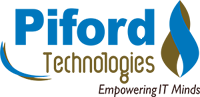

# Text Classification Using Bernoulli Naive Bayes algorithm

In [19]:
import numpy as np
import pandas as pd

df = pd.read_csv('Restaurant_Reviews.tsv',sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [20]:
df.shape

(1000, 2)

In [21]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

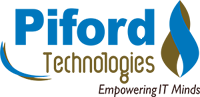

# Text Cleaning -
### Remove Punctuation, remove stop words, tokenize the setence into words, convert words into numbers

In [23]:
from nltk.corpus import stopwords

stopWords = set(stopwords.words('english'))
print(stopWords)


{'are', 'on', 'during', 'that', 'a', 'doesn', 'being', 'now', 'hadn', 'such', 'to', 'isn', 'his', 'had', 'very', 'how', 'by', 'wouldn', "didn't", 'this', 'them', "aren't", 'but', 'ourselves', "wouldn't", 'll', 'each', 'before', "won't", 'me', 'aren', 'ma', 'ours', 'who', 'under', 'these', 'they', 'few', 'out', 're', "isn't", 'or', 'which', 'while', 'won', 'am', 'from', "mustn't", 'hasn', 'at', "doesn't", 'she', "couldn't", 'nor', "hasn't", 'will', 'and', 'for', 'just', 'there', 'hers', 'as', "haven't", 'themselves', 'only', "it's", 'own', 'above', 'my', 'i', 'he', "should've", 'further', 'y', 'with', 'himself', 'ain', 'your', 'weren', 'then', 'down', 'any', 'should', 't', 'through', 'm', 'in', 'other', 'haven', "you've", 'not', 'some', 'don', 'against', 'can', 'needn', 'off', 'does', 'until', 'shan', 'if', "she's", 'into', 'up', 'after', 'between', 'over', 'so', 'o', 'where', "weren't", 'it', "don't", 'theirs', "wasn't", 'here', 'have', 'most', 'once', 'be', 'were', "you'll", "that'll"

In [46]:
import string
def text_cleaning(a):
 cleaning = [char for char in a if char not in string.punctuation]
 #print(cleaning)
 cleaning=''.join(cleaning)
 #print(cleaning)   
 return [word for word in cleaning.split() if word.lower() not in stopwords.words('english')]



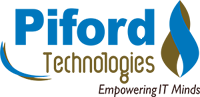

In [25]:

from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_cleaning).fit(df['Review']) 
  

2159


{'Wow': 442,
 'Loved': 248,
 'place': 1540,
 'Crust': 112,
 'good': 1079,
 'tasty': 1932,
 'texture': 1945,
 'nasty': 1408,
 'Stopped': 381,
 'late': 1255,
 'May': 265,
 'bank': 541,
 'holiday': 1162,
 'Rick': 342,
 'Steve': 380,
 'recommendation': 1651,
 'loved': 1305,
 'selection': 1755,
 'menu': 1359,
 'great': 1089,
 'prices': 1584,
 'getting': 1061,
 'angry': 480,
 'want': 2074,
 'damn': 792,
 'pho': 1528,
 'Honeslty': 204,
 'didnt': 832,
 'taste': 1928,
 'fresh': 1035,
 'potatoes': 1571,
 'like': 1279,
 'rubber': 1707,
 'could': 752,
 'tell': 1937,
 'made': 1318,
 'ahead': 463,
 'time': 1966,
 'kept': 1238,
 'warmer': 2078,
 'fries': 1040,
 'touch': 1987,
 'Service': 361,
 'prompt': 1596,
 'Would': 441,
 'go': 1072,
 'back': 532,
 'cashier': 663,
 'care': 656,
 'ever': 939,
 'say': 1736,
 'still': 1870,
 'ended': 921,
 'wayyy': 2092,
 'overpriced': 1474,
 'tried': 1999,
 'Cape': 89,
 'Cod': 100,
 'ravoli': 1634,
 'chicken': 688,
 'cranberrymmmm': 768,
 'disgusted': 856,
 'pretty'

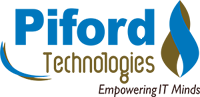

In [27]:
title_bow = bow_transformer.transform(df['Review'])

print(title_bow)

  (0, 248)	1
  (0, 442)	1
  (0, 1540)	1
  (1, 112)	1
  (1, 1079)	1
  (2, 1408)	1
  (2, 1932)	1
  (2, 1945)	1
  (3, 265)	1
  (3, 342)	1
  (3, 380)	1
  (3, 381)	1
  (3, 541)	1
  (3, 1162)	1
  (3, 1255)	1
  (3, 1305)	1
  (3, 1651)	1
  (4, 1089)	1
  (4, 1359)	1
  (4, 1584)	1
  (4, 1755)	1
  (5, 480)	1
  (5, 792)	1
  (5, 1061)	1
  (5, 1528)	1
  :	:
  (997, 1072)	1
  (997, 1199)	1
  (997, 2135)	1
  (998, 288)	1
  (998, 387)	1
  (998, 953)	1
  (998, 1072)	1
  (998, 1420)	1
  (998, 1955)	1
  (998, 1966)	1
  (998, 2020)	1
  (998, 2099)	1
  (998, 2106)	1
  (999, 618)	1
  (999, 679)	1
  (999, 879)	1
  (999, 925)	1
  (999, 1113)	1
  (999, 1274)	1
  (999, 1572)	1
  (999, 1721)	1
  (999, 1966)	1
  (999, 1979)	1
  (999, 2083)	1
  (999, 2138)	1


In [47]:
X = title_bow.toarray()
print(X)

 
X.shape  # 1000,2159  # 2159 seperate words in our dataset and 1000 rows

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(1000, 2159)

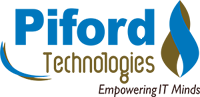

In [29]:
# If you want you can store it in a dataframe also
dd=pd.DataFrame(data=title_bow.toarray(),columns=tokens)
dd

,1,10,100,1199,12,15,15lb,17,1979,2,...,yellowtail,yet,youd,youll,youre,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, df.Liked,test_size=0.2, random_state=50)

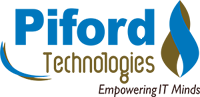

In [35]:
#from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(x_train,y_train)

In [36]:
prediction = model.predict(x_test)
print(prediction)

[0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0
 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1
 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1
 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1
 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0
 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1]


In [37]:
from sklearn.metrics import accuracy_score

accuracy_score(prediction,y_test)

0.715

In [38]:
y_test  #actual records of y_test

316    0
459    1
854    0
11     0
978    0
      ..
37     0
981    0
38     1
333    0
157    1
Name: Liked, Length: 200, dtype: int64